# **Rozkład $t$-Studenta** - $t(n)$
Zmienna losowa $X$ ma rozkład  $t$-Studenta o $n\in\mathbb{N_+}$ stopniach swobody, jeżeli jej gęstość $f$ jest postaci
$$
    f(x)=\frac{\Gamma(\frac{n+1}{2})}{\sqrt{n\pi}\Gamma(\frac{n}{2})}\Big(1+\frac{x^2}{n}\Big)^{-\frac{n+1}{2}} \quad \text{dla} \quad x\in\mathbb{R}.
$$

Wartość oczekiwana i wariancja, dla $n>1$, dane są wzorami
$$
    \mathbb{E}X = 0, \quad \text{Var}(X) = \frac{n}{n-2}.
$$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html#scipy.stats.t

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

### Zadanie
1. Zdefiniuj zmienną losową dla rozkładu $t$-Studenta.
2. Narysuj gęstość.
3. Narysuj dystrybuantę.
4. Wyznacz podstawowe charakterystyki rozkładu: średnia, wariancja, odchylenie standardowe.
5. Wylosuj $n$ obserwacji z zdefiniowanego rozkładu.
6. Narysujmy histogram dla wylosowanej powyżej próbki.

In [2]:
# 1. Definicja
t1 = stats.t(df=1) # df - liczba stopni swobody

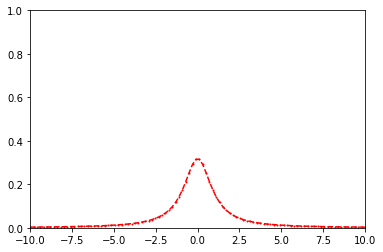

In [3]:
# 2. Gęstość
fig, ax = plt.subplots(1, 1)
ax.set_xlim([-10, 10])
ax.set_ylim([0, 1])

x_value = np.linspace(-10, 10, 100)
ax.plot(x_value, t1.pdf(x_value), 'ro--', ms=1, label='t(1) pdf')

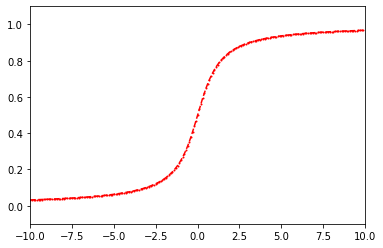

In [4]:
# 3. Dystrybuanta
fig, ax = plt.subplots(1, 1)

ax.set_xlim([-10, 10])
ax.set_ylim([-0.1, 1.1])

x = np.arange(-10, 10, 0.1)
ax.plot(x, t1.cdf(x), 'ro--', ms=1, label='t(1) cdf 1')
plt.show()

In [5]:
# 4.
t1.stats('mv')

(array(inf), array(nan))

In [6]:
t2 = stats.t(df=2)
t2.stats('mv')

(array(0.), array(inf))

In [7]:
t3 = stats.t(df=3)
t3.stats('mv')

(array(0.), array(3.))

### Zadanie
1. Narysuj na jednym wykresie gęstości dla rozkładu t-Studenta dla stopni swobody z zakresu od 1 do 20.
2. Dorysuj wykres gęstości rozkładu normalnego standardowego
3. Wyciągnij wnioski

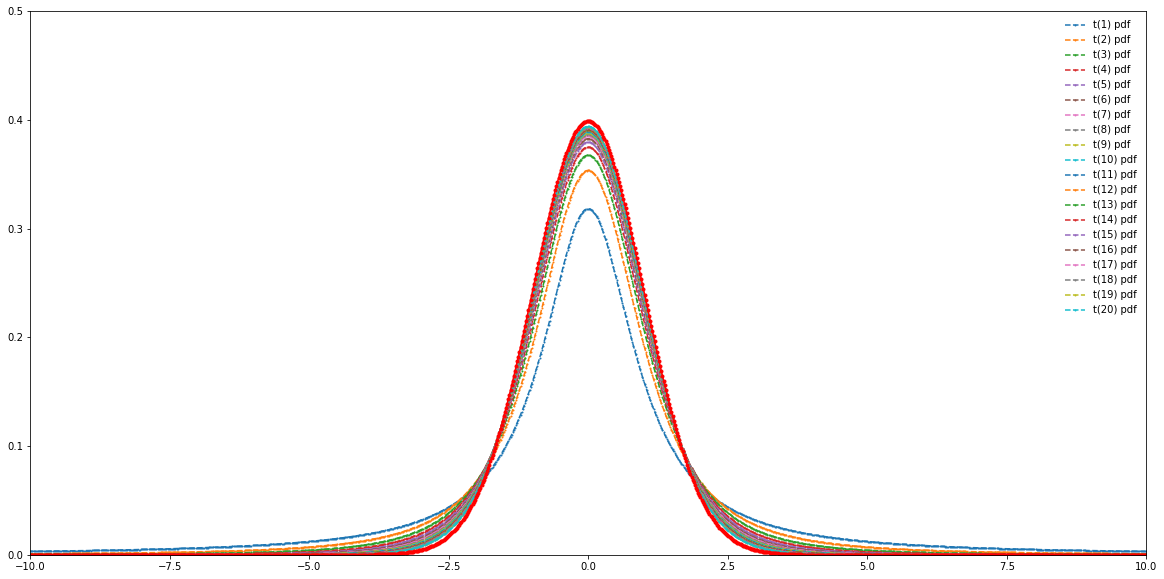

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_xlim([-10, 10])
ax.set_ylim([0, .5])
x_value = np.linspace(-10, 10, 1000)

for i in np.arange(1, 21):
    t = stats.t(df=i)
    ax.plot(x_value, t.pdf(x_value), 'o--', ms=1, label='t({}) pdf'.format(i))
ax.legend(loc='best', frameon=False)

norm01 = stats.norm(loc=0, scale=1)
ax.plot(x_value, norm01.pdf(x_value), 'ro-', ms=3, label='norm(0,1) pdf'.format(i))
plt.show()

**Wniosek**: Wraz ze wzrostem stopni swobody rozkładu $t$-Studenta, rozkład zbiega do rozkładu normalnego standardowego.

### Zadanie
Sprawdzić empirycznie następujące własności:
1. Jeśli $X_1, \ldots, X_n$ będzie próbą z rozkładu normalnego $\mathcal{N}(\mu,\sigma)$ to zmienna $Y=\frac{\overline{X}-\mu}{S}\sqrt{n}$ pochodzi z rozkładu $t$-Studenta z $n-1$ stopniami swobody.

**Wskazkówka**: $S^2=\frac{1}{n-1}\sum_{i=1}^n(X_i-\overline{X})^2$.

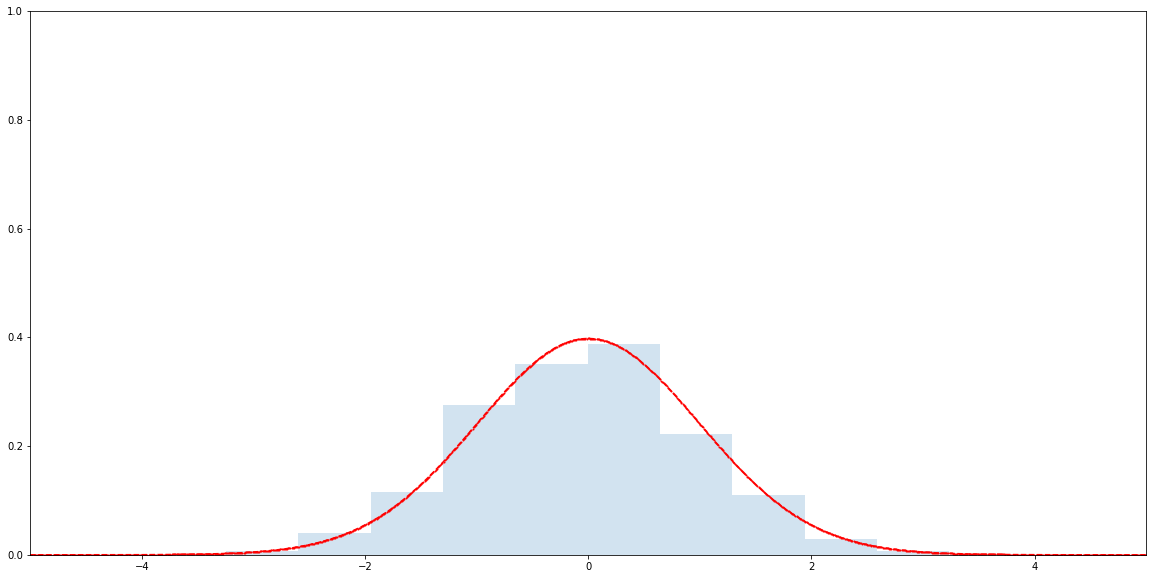

In [9]:
N,n = 1000, 100
mu, sigma = 1, 4
norm = stats.norm(loc=mu, scale=sigma)

Y = np.zeros(N)
for i in np.arange(N):
    x_sample = norm.rvs(size=n)
    x_mean = np.mean(x_sample)
    s = np.std(x_sample, ddof=1)
    Y[i] = np.sqrt(n) * (x_mean - mu) / s 

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.set_xlim([-5, 5])
ax.set_ylim([0, 1])
x_value = np.linspace(-5, 5, 1000)

tstud = stats.t(df=n-1)
plt.hist(Y, histtype='stepfilled', alpha=0.2, density=True)
plt.plot(x_value, tstud.pdf(x_value), 'ro--', ms=1)
plt.show()